In [187]:
import numpy as np
from sklearn.model_selection import train_test_split

In [188]:
# import data
data = np.delete(np.genfromtxt('titanic_data.csv', delimiter=','), 0, 0)
X = data[:,1:]
y_label = data[:,0]

In [189]:
# transform
for i in range(X.shape[1]):
    if i == 1:
        continue
    X[:,i] = (X[:,i] - np.min(X[:,i]))/(np.max(X[:,i]) - np.min(X[:,i]))
#     X[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])

In [190]:
# generate train_set and test_set
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2)

In [191]:
# metric = 'manhattan'
def dis(x,y):
    ans = np.sum(np.abs(y-x))
    if ans == 0:
        return 1e-10
    return ans
# metric = 'euclidean'
def l2(x,y):
    ans = np.linalg.norm(x-y)
    if ans == 0:
        return 1e-10
    return ans

In [192]:
# KNN
import heapq
def knn_predict(k, x, dataset, label):
    N = len(dataset)
    h = []
    for i in range(N):
        distance = l2(x, dataset[i])
        heapq.heappush(h, (distance, i))
    ans = [heapq.heappop(h)[1] for i in range(min(k,N))]
    p = sum([label[i] for i in ans])/len(ans)
    if (p >= 0.5):
        return 1
    return 0
i = 13
k = 5
print(X_test[i], y_test[i])
print(knn_predict(k, X_test[i], X_train, y_train))

[1.         0.         0.43453129 0.         0.         0.01571255] 0.0
0


In [193]:
# KFold
ans = np.zeros(len(X))
k = 6
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_label[train_index], y_label[test_index]
    for i in range(len(test_index)):
        ans[test_index[i]] = (knn_predict(k, X_test[i], X_train, y_train) == y_test[i])
accuracy = sum(ans)/len(ans)
print(accuracy)

0.7812852311161218


In [194]:
# find best k
from sklearn.model_selection import KFold
def Acc(k, splits):
    ans = np.zeros(len(X))
    kf = KFold(n_splits = splits, shuffle = True)
    kf.get_n_splits(X)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y_label[train_index], y_label[test_index]
        for i in range(len(test_index)):
            ans[test_index[i]] = (knn_predict(k, X_test[i], X_train, y_train) == y_test[i])
    accuracy = sum(ans)/len(ans)
    return accuracy

In [195]:
for k in range(4,11):
    print(k, Acc(k, 10))

4 0.790304396843292
5 0.8128523111612176
6 0.8049605411499436
7 0.8049605411499436
8 0.8015783540022547
9 0.8060879368658399
10 0.8015783540022547


In [196]:
print(k, Acc(5, 10))

10 0.8094701240135288


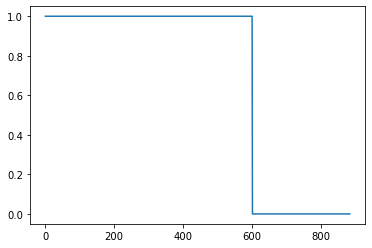

In [211]:
data = np.delete(np.genfromtxt('titanic_data.csv', delimiter=','), 0, 0)
x = np.array([1, 1, 22, 1, 0, 71.2833])
xx = data[:,1:]
# transform
for i in range(len(x)):
    if i == 1:
        continue
    x[i] = (x[i] - np.min(xx[:,i]))/(np.max(xx[:,i]) - np.min(xx[:,i]))
# predict
p = [knn_predict(k, x, X, y_label) for k in range(1,X.shape[0])]
import matplotlib.pyplot as plt
plt.plot(p)